In [1]:
from visualize_embeddings import *
import torch

/Users/hoener/miniforge3/envs/mphil/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sPathEmbeddings = "../../data/processed/summary_embeddings/"
sNameEmbeddingA = "tangible_hair_prec.pkl"
sNameEmbeddingB = "intangible_hair_prec.pkl"
iNumEmbeddings = 5

In [8]:
# Surface cleaner
lClaimsSurface = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Restore surfaces to their original luster with ease.",
    "Enjoy visibly brighter and shinier countertops, tables, and more.",
    "Transform dull surfaces into glossy showcases in seconds.",
    "Witness the difference with surfaces that look and feel brand new.",
    "Get a professional-level shine without the hassle or expense.", # ^tangible
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate.",
    "Feel the satisfaction of a space that sparkles with cleanliness.",
    "Transform your living space into a haven of luminosity.",
    "Revel in the beauty of surfaces that reflect your attention to detail.",
    "Discover the magic of surfaces that shimmer with cleanliness.",
    "Immerse yourself in the brilliance of a home that truly shines."
]
# Hair product
lClaimsHair = [
    "Experience 50% more visible shine after just one use.",
    "Formulated with light-reflecting technology for a glossy finish.",
    "Transform dull strands into radiant, luminous locks.",
    "Infused with nourishing oils that enhance natural shine.",
    "See instant brilliance with our advanced shine-boosting formula.",
    "Locks in moisture to amplify hair's natural luster.",
    "Achieve salon-quality shine without leaving home.",
    "Visible reduction in dullness, replaced with stunning shine.",
    "Say goodbye to lackluster hair, hello to mirror-like shine.",
    "Clinically proven to enhance shine by up to 70%.", # ^tangible
    "Elevate your confidence with hair that gleams under any light.",
    "Embrace the allure of luminous hair that turns heads.",
    "Unleash the power of radiant hair that speaks volumes.",
    "Transform your look with hair that exudes brilliance.",
    "Feel the difference of hair that shines with vitality and health.",
    "Rediscover the joy of hair that beams with inner vibrancy.",
    "Indulge in the luxury of hair that shimmers with elegance.",
    "Step into the spotlight with hair that radiates beauty.",
    "Experience the magic of hair that dazzles with every movement.",
    "Unlock the secret to hair that shines from within, reflecting your inner glow."
]

lClaimsSurfaceShort = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate."]

lClaimsHairShort = [
    "Experience mirror-like shine with every wash.",
    "Get dazzling, glossy hair in just one use.",
    "Transform dull strands into radiant locks.",
    "Achieve salon-quality shine at home.",
    "Enhance natural brilliance with our advanced formula.",
    "Unlock the confidence of luminous hair that turns heads.",
    "Experience the joy of hair that gleams with vitality.",
    "Embrace the radiance of hair that reflects your inner beauty.",
    "Elevate your everyday with hair that shines with sophistication.",
    "Feel the allure of irresistibly shiny hair that captivates."
]

lClaimsHairCleaner2 = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate.",
    "Experience mirror-like shine with every wash.",
    "Get dazzling, glossy hair in just one use.",
    "Transform dull strands into radiant locks.",
    "Achieve salon-quality shine at home.",
    "Enhance natural brilliance with our advanced formula.",
    "Unlock the confidence of luminous hair that turns heads.",
    "Experience the joy of hair that gleams with vitality.",
    "Embrace the radiance of hair that reflects your inner beauty.",
    "Elevate your everyday with hair that shines with sophistication.",
    "Feel the allure of irresistibly shiny hair that captivates."
    ]

lClaimsHairCleaner = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Experience mirror-like shine with every wash.",
    "Get dazzling, glossy hair in just one use.",
    "Transform dull strands into radiant locks.",
    "Achieve salon-quality shine at home.",
    "Enhance natural brilliance with our advanced formula.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate.",
    "Unlock the confidence of luminous hair that turns heads.",
    "Experience the joy of hair that gleams with vitality.",
    "Embrace the radiance of hair that reflects your inner beauty.",
    "Elevate your everyday with hair that shines with sophistication.",
    "Feel the allure of irresistibly shiny hair that captivates."
    ]

lClaimsHairCleanerOrder = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate.",
    "Unlock the confidence of luminous hair that turns heads.",
    "Experience mirror-like shine with every wash.",
    "Get dazzling, glossy hair in just one use.",
    "Transform dull strands into radiant locks.",
    "Achieve salon-quality shine at home.",
    "Enhance natural brilliance with our advanced formula.",
    "Experience the joy of hair that gleams with vitality.",
    "Embrace the radiance of hair that reflects your inner beauty.",
    "Elevate your everyday with hair that shines with sophistication.",
    "Feel the allure of irresistibly shiny hair that captivates."
    ]

lTargetStrings = [
    "Our surface cleaner delivers a mirror-like shine every time.",
    "Say goodbye to streaks and smudges with our powerful formula.",
    "Achieve a noticeable sparkle on all surfaces with just one application.",
    "Experience surfaces so clean, you can see your reflection in them.",
    "Our cleaner leaves behind a gleaming, polished finish that lasts.",
    "Elevate your surroundings with a touch of brilliance.",
    "Unleash the hidden beauty of your home with our surface cleaner.",
    "Experience the joy of pristine surfaces that brighten your space.",
    "Bring a sense of clarity and freshness to your environment.",
    "Enhance the ambiance of any room with surfaces that radiate."
]

lTargetStrings = [
    "Locks in moisture to amplify hair's natural luster.",
    "Achieve salon-quality shine without leaving home.",
    "Visible reduction in dullness, replaced with stunning shine.",
    "Say goodbye to lackluster hair, hello to mirror-like shine.",
    "Clinically proven to enhance shine by up to 70%.", # ^tangible
    "Elevate your confidence with hair that gleams under any light.",
    "Embrace the allure of luminous hair that turns heads.",
    "Unleash the power of radiant hair that speaks volumes.",
    "Transform your look with hair that exudes brilliance.",
    "Feel the difference of hair that shines with vitality and health."]

lClaims = lTargetStrings

In [9]:
from transformers import AutoTokenizer, GPT2LMHeadModel

s_model = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(s_model)
tokenizer = AutoTokenizer.from_pretrained(s_model)

lInputEmbeddings = list()
for claim in lClaims:
    lInputEmbeddings.append(torch.mean(model.get_input_embeddings()(tokenizer.encode(claim, return_tensors="pt")), dim = 1))
tInputEmbeddings = torch.stack(lInputEmbeddings).squeeze(1)

In [13]:
#tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, sNameEmbeddingA, sNameEmbeddingB)
#tEmbeddings = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
#tEmbeddings = torch.load("embedding_pred_new_cleaner.pt").cpu()
tEmbeddings = torch.load("hair10_indiv_embedd_ae.pt", map_location=torch.device('cpu')).squeeze()
#tEmbeddingsOrder = torch.load("embedding_pred_hair_cleaner_1LL.pt").cpu()
#tEmbeddings = torch.cat([tEmbeddings[0:6, :], tEmbeddings[11:16, :], tEmbeddings[6:11, :], tEmbeddings[16:, :]], dim=0)

tEmbeddings_demeaned = tEmbeddings - torch.mean(tEmbeddings, dim=0)

tInputEmbeddingsA, tInputEmbeddingsB = tInputEmbeddings[:iNumEmbeddings], tInputEmbeddings[iNumEmbeddings:]
tInputEmbeddings = torch.cat((tInputEmbeddingsA, tInputEmbeddingsB), dim=0)
tInputEmbeddings_demeaned = tInputEmbeddings - torch.mean(tInputEmbeddings, dim=0)
#tEmbeddings_demeaned = tEmbeddings - torch.mean(tEmbeddings, dim=1).reshape(-1, 1)

# tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_{sNameEmbeddingA}", f"first_last_layer/lh_{sNameEmbeddingB}")
# tLLEmbeddings = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
# tLLEmbeddings_demeaned = tLLEmbeddings - torch.mean(tLLEmbeddings, dim=0)

# tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_{sNameEmbeddingA}", f"first_last_layer/fh_{sNameEmbeddingB}")
# tFLEmbeddings = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
# tFLEmbeddings_demeaned = tFLEmbeddings - torch.mean(tFLEmbeddings, dim=0)

In [14]:
SE = SummaryEmbeddings(lClaims)
seBert = SE.bert()
seBoW = SE.bow()
seWord2Vec = SE.word2vec()

similarity_matrix_bert = calc_similarity_matrix(seBert)
similarity_matrix_bow = calc_similarity_matrix(seBoW)
similarity_matrix_word2vec = calc_similarity_matrix(seWord2Vec)
similarity_matrix_re = calc_similarity_matrix(tEmbeddings.cpu().detach().numpy())
similarity_matrix_ie = calc_similarity_matrix(tInputEmbeddings.detach().numpy())
#similarity_matrix_re_fl = calc_similarity_matrix(tFLEmbeddings.detach().numpy())
#similarity_matrix_re_ll = calc_similarity_matrix(tLLEmbeddings.detach().numpy())

ts_similarity_matrix_bert = calc_similarity_matrix(np.transpose(seBert))
ts_similarity_matrix_bow = calc_similarity_matrix(np.transpose(seBoW))
ts_similarity_matrix_word2vec = calc_similarity_matrix(np.transpose(seWord2Vec))
ts_similarity_matrix_re = calc_similarity_matrix(np.transpose(tEmbeddings.cpu().detach().numpy()))
ts_similarity_matrix_ie = calc_similarity_matrix(np.transpose(tInputEmbeddings.detach().numpy()))
#ts_similarity_matrix_re_fl = calc_similarity_matrix(np.transpose(tFLEmbeddings.detach().numpy()))
#ts_similarity_matrix_re_ll = calc_similarity_matrix(np.transpose(tLLEmbeddings.detach().numpy()))

torch.Size([10, 768])


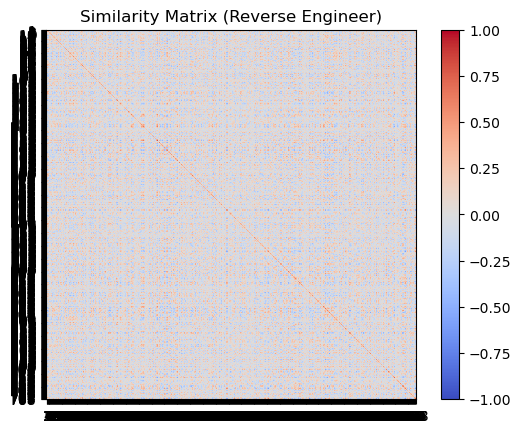

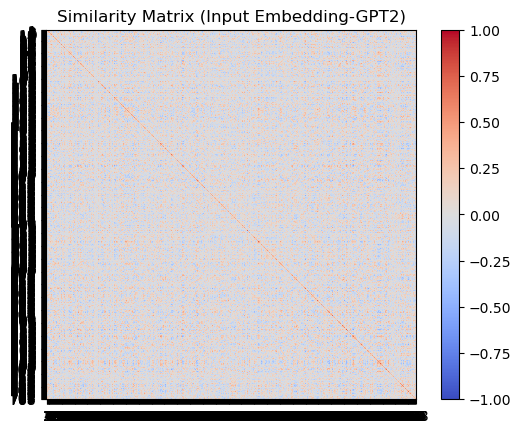

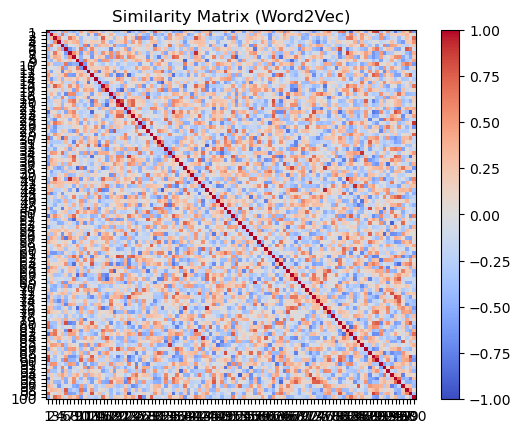

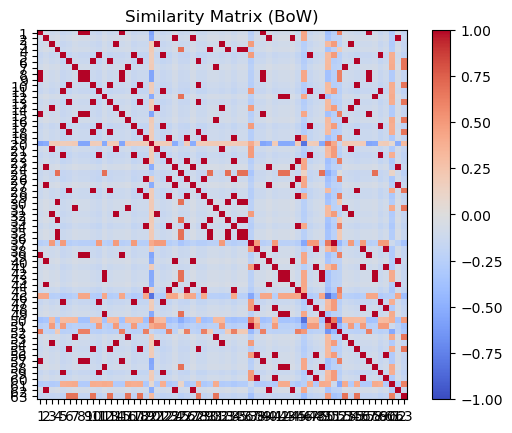

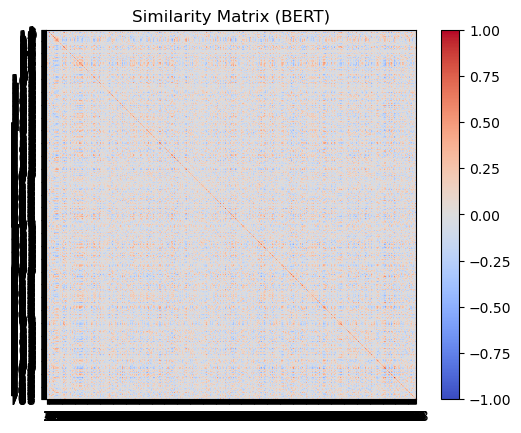

In [15]:
visualize_correlations(ts_similarity_matrix_re, "Reverse Engineer")
#visualize_correlations(ts_similarity_matrix_re_fl, "FL-Reverse Engineer")
#visualize_correlations(ts_similarity_matrix_re_ll, "LL-Reverse Engineer")
visualize_correlations(ts_similarity_matrix_ie, "Input Embedding-GPT2")
visualize_correlations(ts_similarity_matrix_word2vec, "Word2Vec")
visualize_correlations(ts_similarity_matrix_bow, "BoW")
visualize_correlations(ts_similarity_matrix_bert, "BERT")

In [65]:
lClaims

['Our surface cleaner delivers a mirror-like shine every time.',
 'Say goodbye to streaks and smudges with our powerful formula.',
 'Achieve a noticeable sparkle on all surfaces with just one application.',
 'Experience surfaces so clean, you can see your reflection in them.',
 'Our cleaner leaves behind a gleaming, polished finish that lasts.',
 'Elevate your surroundings with a touch of brilliance.',
 'Unleash the hidden beauty of your home with our surface cleaner.',
 'Experience the joy of pristine surfaces that brighten your space.',
 'Bring a sense of clarity and freshness to your environment.',
 'Enhance the ambiance of any room with surfaces that radiate.',
 'Experience mirror-like shine with every wash.',
 'Get dazzling, glossy hair in just one use.',
 'Transform dull strands into radiant locks.',
 'Achieve salon-quality shine at home.',
 'Enhance natural brilliance with our advanced formula.',
 'Unlock the confidence of luminous hair that turns heads.',
 'Experience the joy o

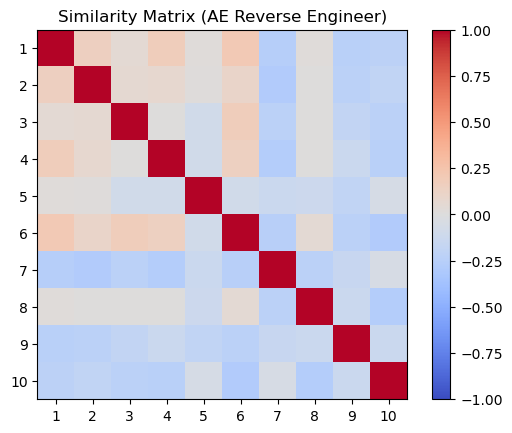

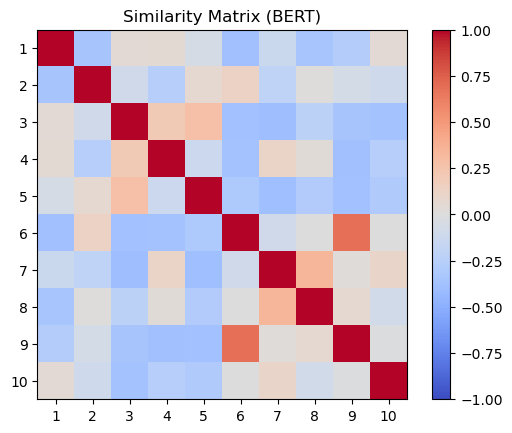

In [16]:
#| label: fig-corr1
#| layout-ncol: 2
visualize_correlations(similarity_matrix_re, "AE Reverse Engineer")
visualize_correlations(similarity_matrix_bert, "BERT")

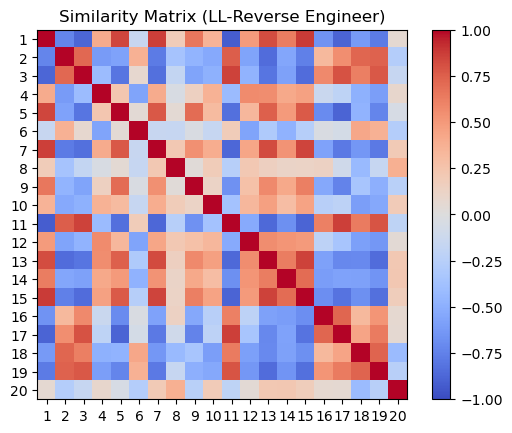

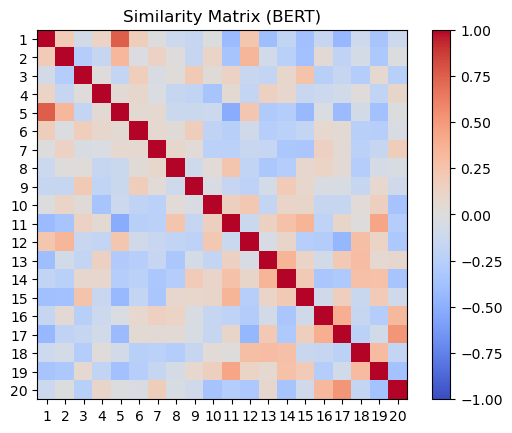

In [81]:
#| label: fig-corr2
#| layout-ncol: 2
visualize_correlations(similarity_matrix_re_ll, "LL-Reverse Engineer")
visualize_correlations(similarity_matrix_bert, "BERT")

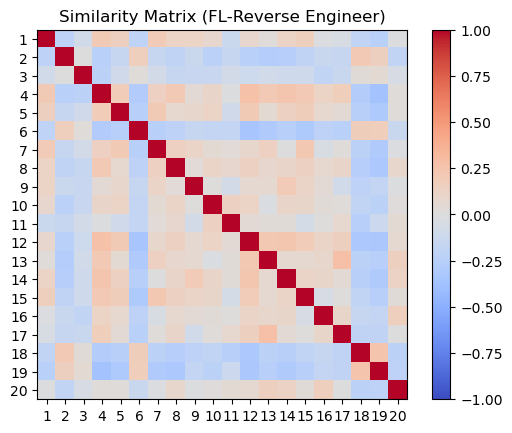

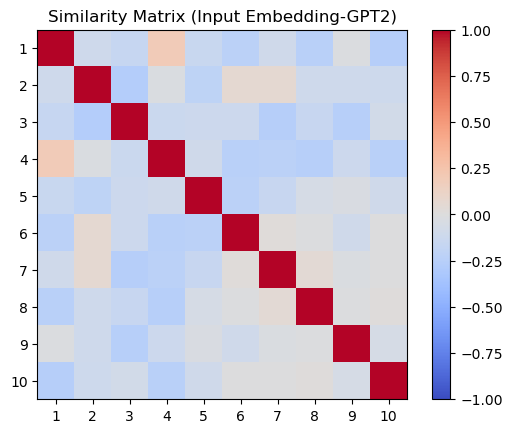

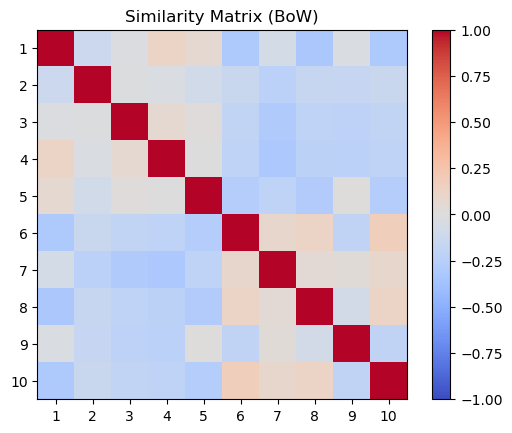

In [14]:
#| label: fig-corr3
#| layout-ncol: 3
visualize_correlations(similarity_matrix_re_fl, "FL-Reverse Engineer")
visualize_correlations(similarity_matrix_ie, "Input Embedding-GPT2")
visualize_correlations(similarity_matrix_bow, "BoW")

In [109]:
# surface, RE
lClaims[13], lClaims[1]

('Transform your look with hair that exudes brilliance.',
 'Formulated with light-reflecting technology for a glossy finish.')

In [110]:
# hair
lClaims[11], lClaims[17], lClaims[16]

('Embrace the allure of luminous hair that turns heads.',
 'Step into the spotlight with hair that radiates beauty.',
 'Indulge in the luxury of hair that shimmers with elegance.')

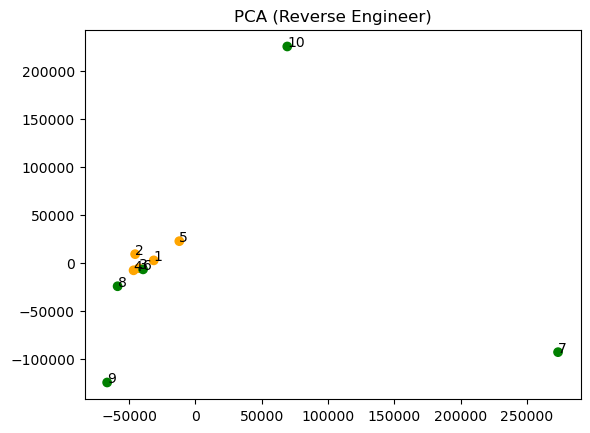

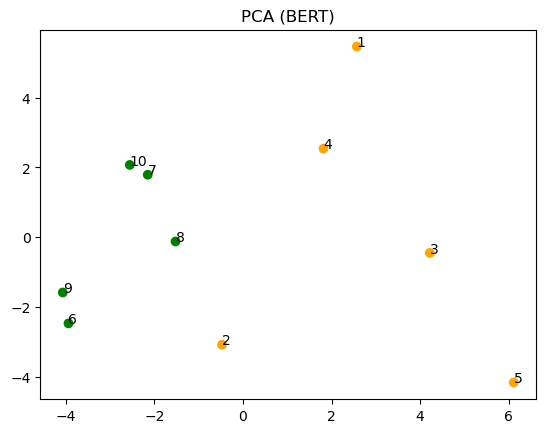

In [17]:
#| label: fig-pca
#| layout-ncol: 3
visualize_pca(tEmbeddings.detach().numpy(), "Reverse Engineer")
#visualize_pca(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer")
visualize_pca(seBert, "BERT")

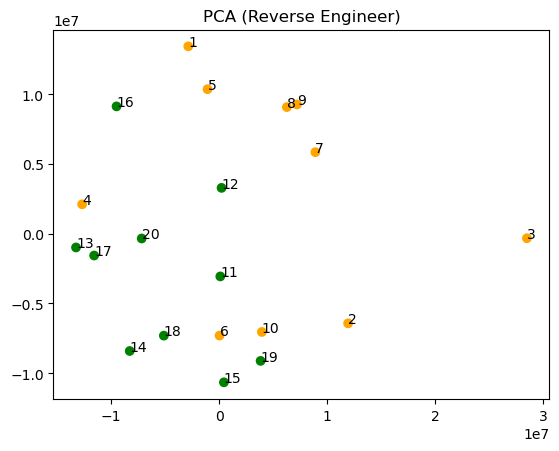

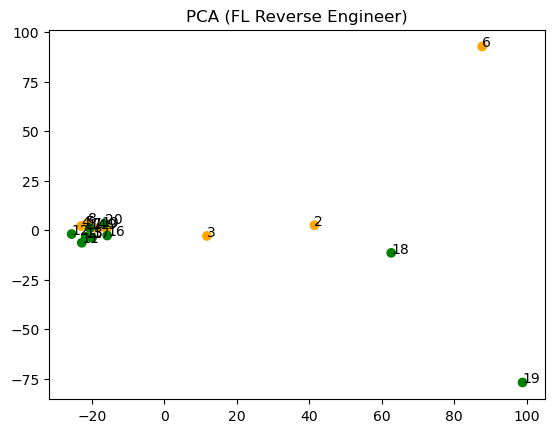

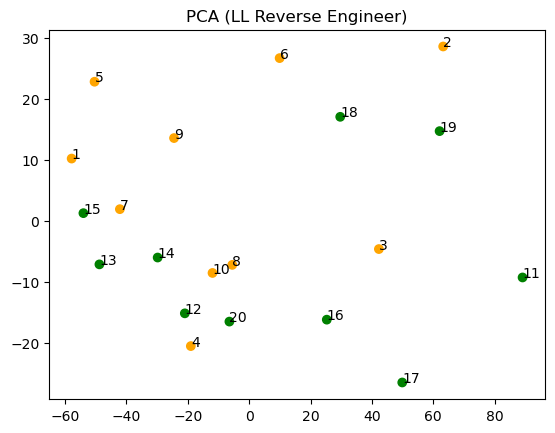

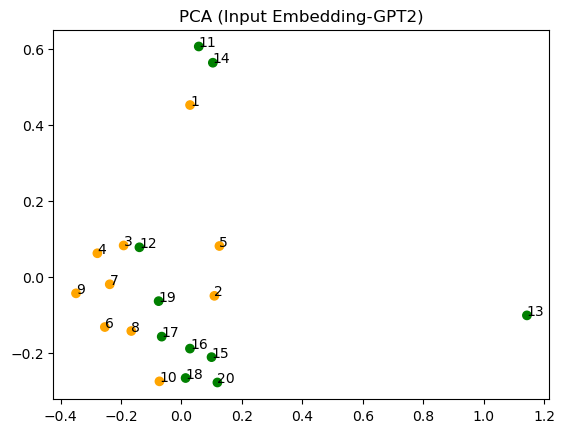

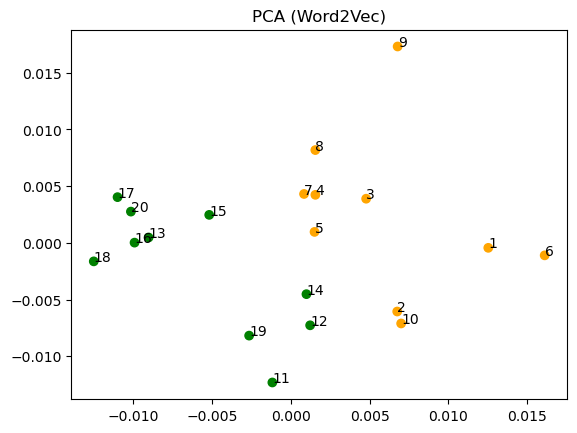

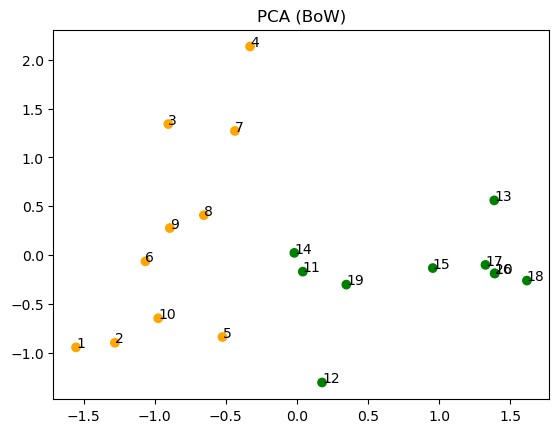

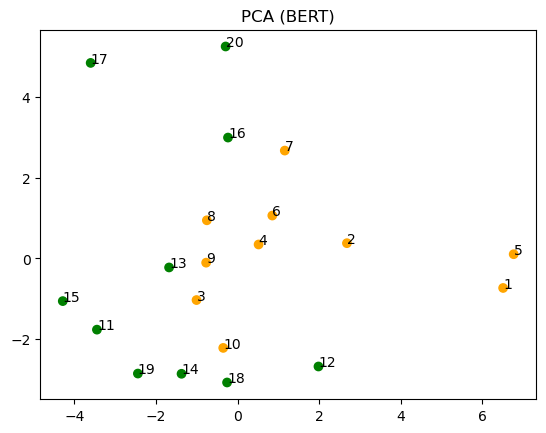

In [83]:
visualize_pca(tEmbeddings.detach().numpy(), "Reverse Engineer")
visualize_pca(tFLEmbeddings.detach().numpy(), "FL Reverse Engineer")
visualize_pca(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer")
visualize_pca(tInputEmbeddings.detach().numpy(), "Input Embedding-GPT2")
visualize_pca(seWord2Vec, "Word2Vec")
visualize_pca(seBoW, "BoW")
visualize_pca(seBert, "BERT")

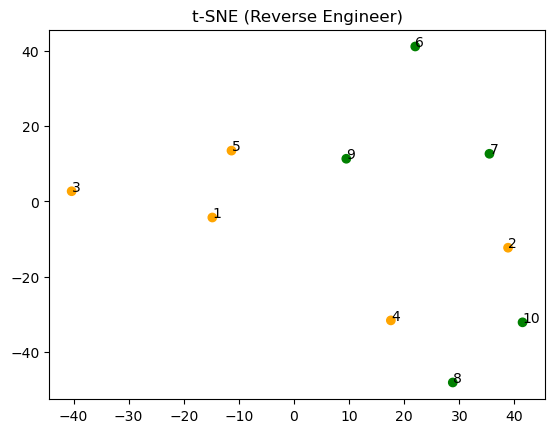

NameError: name 'tFLEmbeddings' is not defined

In [38]:
iPerplexity = iNumEmbeddings
visualize_tsne(tEmbeddings.detach().numpy(), "Reverse Engineer", iPerplexity)
visualize_tsne(tFLEmbeddings.detach().numpy(), "FL Reverse Engineer", iPerplexity)
visualize_tsne(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer", iPerplexity)
visualize_tsne(tInputEmbeddings.detach().numpy(), "Input Embedding-GPT2", iPerplexity)
visualize_tsne(seWord2Vec, "Word2Vec", iPerplexity)
visualize_tsne(seBoW, "BoW", iPerplexity)
visualize_tsne(seBert, "BERT", iPerplexity)

In [12]:
#| label: fig-tsne
#| layout-ncol: 3
visualize_tsne(tEmbeddings.detach().numpy(), "Reverse Engineer", iPerplexity)
visualize_tsne(tLLEmbeddings.detach().numpy(), "LL Reverse Engineer", iPerplexity)
visualize_tsne(seBert, "BERT", iPerplexity)

NameError: name 'iPerplexity' is not defined

In [115]:
# hair
lClaims[11], lClaims[12], lClaims[1]

('Embrace the allure of luminous hair that turns heads.',
 'Unleash the power of radiant hair that speaks volumes.',
 'Formulated with light-reflecting technology for a glossy finish.')

In [39]:
tEmbeddingsA = tEmbeddings[:iNumEmbeddings]
tEmbeddingsB = tEmbeddings[iNumEmbeddings:]
tEmbeddings_demeaned = tEmbeddings - torch.mean(tEmbeddings, dim=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


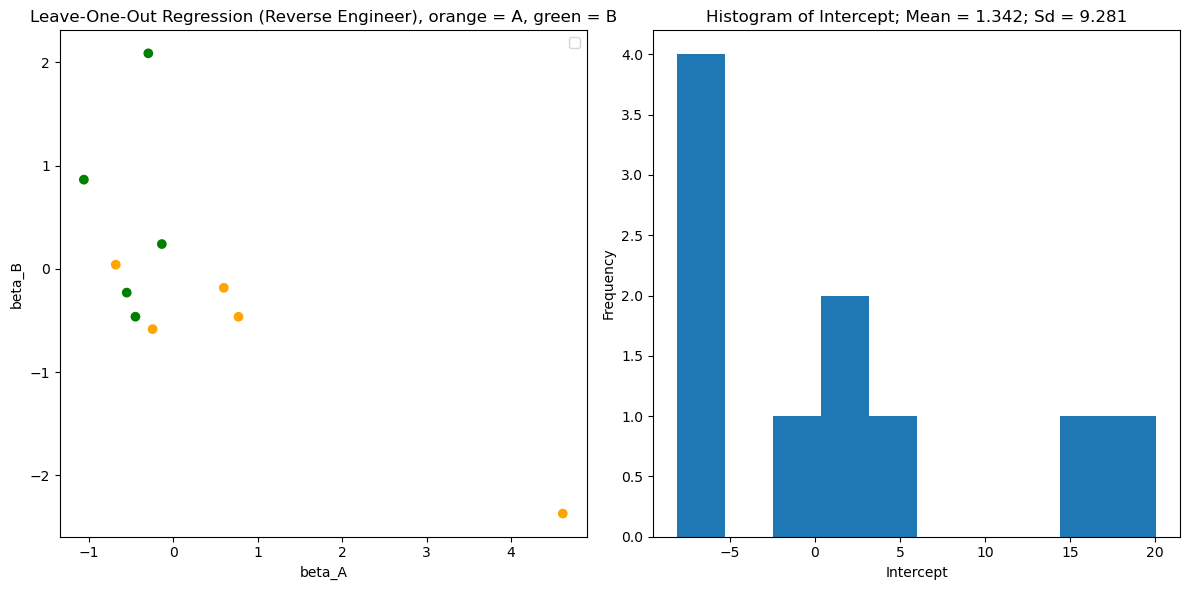

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


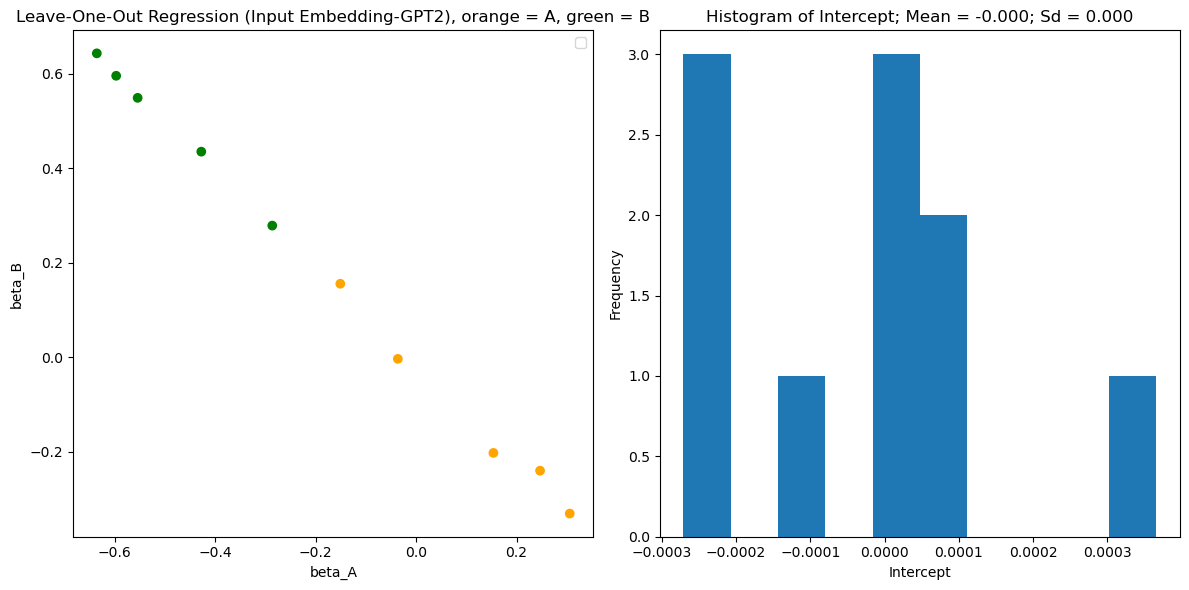

/Users/hoener/miniforge3/envs/mphil/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hoener/miniforge3/envs/mphil/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


MissingDataError: exog contains inf or nans

In [40]:
lResults = loo_regression(tEmbeddingsA.detach().numpy(), tEmbeddingsB.detach().numpy(), tEmbeddings_demeaned.detach().numpy(), "Reverse Engineer")
#lResults = loo_regression(tFLEmbeddingsA.detach().numpy(), tFLEmbeddingsB.detach().numpy(), tFLEmbeddings_demeaned.detach().numpy(), "FL Reverse Engineer")
#lResults = loo_regression(tLLEmbeddingsA.detach().numpy(), tLLEmbeddingsB.detach().numpy(), tLLEmbeddings_demeaned.detach().numpy(), "LL Reverse Engineer")
lResults = loo_regression(tInputEmbeddingsA.detach().numpy(), tInputEmbeddingsB.detach().numpy(), tInputEmbeddings_demeaned.detach().numpy(), "Input Embedding-GPT2")
lResults = loo_regression(seWord2Vec[:10, ], seWord2Vec[10:, ], seWord2Vec - np.mean(seWord2Vec, axis=0), "Word2Vec")
lResults = loo_regression(seBoW[:10, ], seBoW[10:, ], seBoW - np.mean(seBoW, axis=0), "BoW")
lResults = loo_regression(seBert[:10, ], seBert[10:, ], seBert - np.mean(seBert, axis=0), "BERT")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


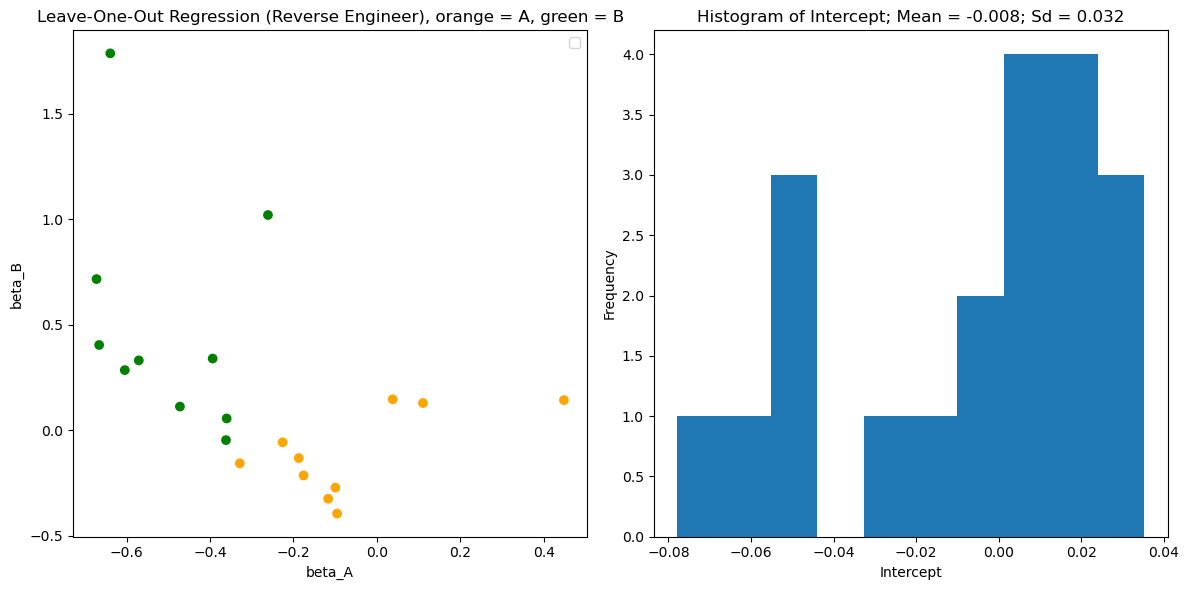

In [117]:
#| label: fig-loo1
lResults = loo_regression(tEmbeddingsA.detach().numpy(), tEmbeddingsB.detach().numpy(), tEmbeddings_demeaned.detach().numpy(), "Reverse Engineer")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


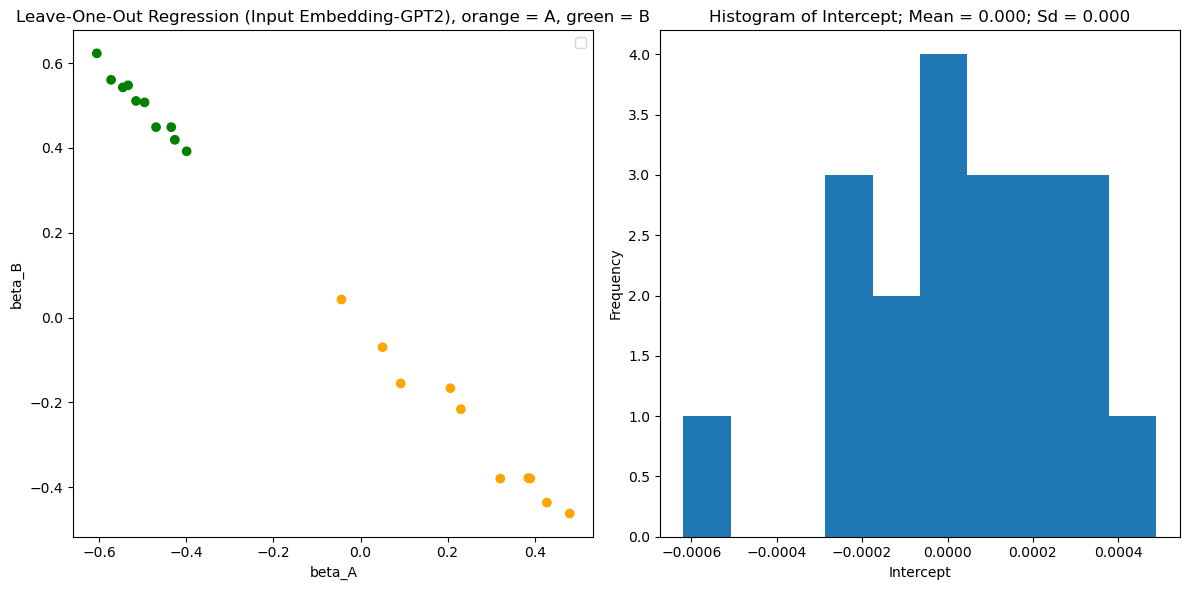

In [118]:
#| label: fig-loo2
lResults = loo_regression(tInputEmbeddingsA.detach().numpy(), tInputEmbeddingsB.detach().numpy(), tInputEmbeddings_demeaned.detach().numpy(), "Input Embedding-GPT2")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


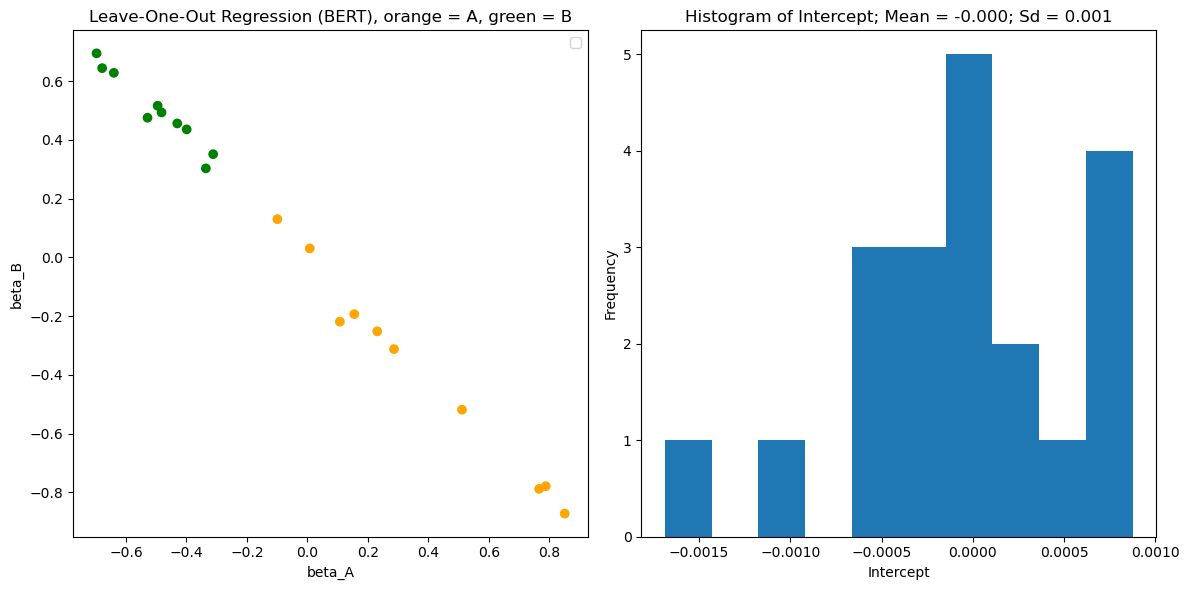

In [119]:
#| label: fig-loo3
lResults = loo_regression(seBert[:10, ], seBert[10:, ], seBert - np.mean(seBert, axis=0), "BERT")

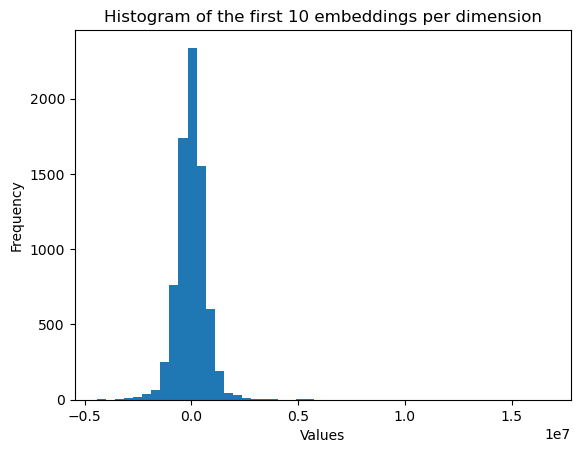

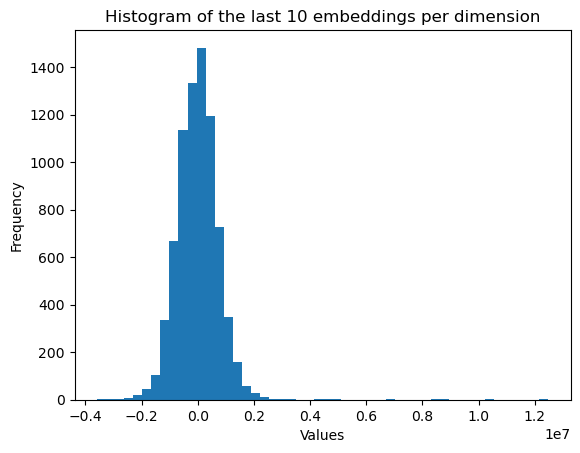

In [91]:
plt.hist(tEmbeddings[:iNumEmbeddings, :].detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of the first {iNumEmbeddings} embeddings per dimension')
plt.show()

plt.hist(tEmbeddings[iNumEmbeddings:, :].detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(f'Histogram of the last {iNumEmbeddings} embeddings per dimension')
plt.show()

In [51]:
tEmbeddings

tensor([[-3709.4578,  2878.2976, -1713.4880,  ...,  1849.9667,    64.4262,
          -559.0258],
        [-8414.7266,  5702.7163, -1180.9299,  ...,  1181.7460,  9603.0732,
         -3772.4585],
        [  -67.2520,   923.9615,  -375.4893,  ...,  2936.9207, -1259.2415,
           972.5280],
        ...,
        [  764.8811,  1418.1522,  1780.1992,  ...,  6095.8315,  4840.1294,
           911.6246],
        [-1420.7234,  2287.3301,   864.4269,  ...,  4448.9268,  5245.1016,
          -194.5700],
        [-2308.0000,  5505.7129,  5039.6597,  ..., 12770.9434, 21141.2969,
         -1176.3019]], grad_fn=<ToCopyBackward0>)

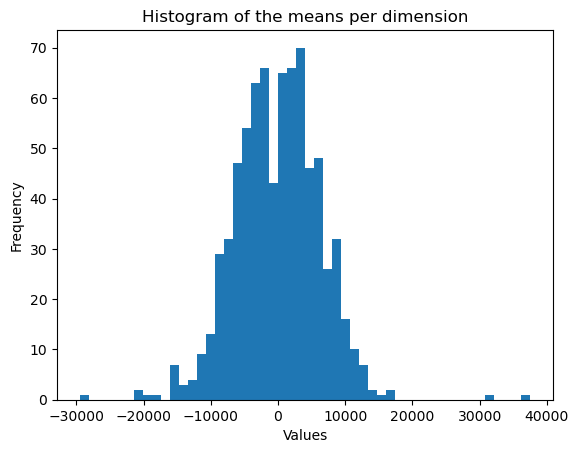

In [53]:
plt.hist(torch.mean(tEmbeddings, dim=0).detach().flatten(), bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of the means per dimension')
plt.show()

In [122]:
tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, "tangible_hair_prec.pkl", "intangible_hair_prec.pkl")
tEmbeddingsHair = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
tEmbeddingsHair_demeaned = tEmbeddingsHair - torch.mean(tEmbeddingsHair, dim=0)

tEmbeddingsA, tEmbeddingsB = load_embeddings(sPathEmbeddings, "tangible_cleaner_prec.pkl", "intangible_cleaner_prec.pkl")
tEmbeddingsCleaner = torch.cat((tEmbeddingsA, tEmbeddingsB), dim=0)
tEmbeddingsCleaner_demeaned = tEmbeddingsCleaner - torch.mean(tEmbeddingsHair, dim=0)

tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_tangible_hair_prec.pkl", f"first_last_layer/lh_intangible_hair_prec.pkl")
tLLEmbeddingsHair = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
tLLEmbeddingsHair_demeaned = tLLEmbeddingsHair - torch.mean(tLLEmbeddingsHair, dim=0)

tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_tangible_hair_prec.pkl", f"first_last_layer/fh_intangible_hair_prec.pkl")
tFLEmbeddingsHair = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
tFLEmbeddingsHair_demeaned = tFLEmbeddingsHair - torch.mean(tFLEmbeddingsHair, dim=0)

tLLEmbeddingsA, tLLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/lh_tangible_cleaner_prec.pkl", f"first_last_layer/lh_intangible_cleaner_prec.pkl")
tLLEmbeddingsCleaner = torch.cat((tLLEmbeddingsA, tLLEmbeddingsB), dim=0)
tLLEmbeddingsCleaner_demeaned = tLLEmbeddingsCleaner - torch.mean(tLLEmbeddingsCleaner, dim=0)

tFLEmbeddingsA, tFLEmbeddingsB = load_embeddings(sPathEmbeddings, f"first_last_layer/fh_tangible_cleaner_prec.pkl", f"first_last_layer/fh_intangible_cleaner_prec.pkl")
tFLEmbeddingsCleaner = torch.cat((tFLEmbeddingsA, tFLEmbeddingsB), dim=0)
tFLEmbeddingsCleaner_demeaned = tFLEmbeddingsCleaner - torch.mean(tFLEmbeddingsCleaner, dim=0)

s_model = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(s_model)
tokenizer = AutoTokenizer.from_pretrained(s_model)

lInputEmbeddingsAll = list()
for claim in lClaimsAll:
    lInputEmbeddingsAll.append(torch.mean(model.get_input_embeddings()(tokenizer.encode(claim, return_tensors="pt")), dim = 1))
tInputEmbeddingsAll = torch.stack(lInputEmbeddingsAll).squeeze(1)


In [110]:
tEmbeddingsHair = tEmbeddingsOrder[10:]
tEmbeddingsCleaner = tEmbeddingsOrder[:10]

In [99]:
tEmbeddings.shape

torch.Size([20, 768])

In [104]:
lClaimsAll

40

In [106]:
lClaims

['Our surface cleaner delivers a mirror-like shine every time.',
 'Say goodbye to streaks and smudges with our powerful formula.',
 'Achieve a noticeable sparkle on all surfaces with just one application.',
 'Experience surfaces so clean, you can see your reflection in them.',
 'Our cleaner leaves behind a gleaming, polished finish that lasts.',
 'Experience mirror-like shine with every wash.',
 'Get dazzling, glossy hair in just one use.',
 'Transform dull strands into radiant locks.',
 'Achieve salon-quality shine at home.',
 'Enhance natural brilliance with our advanced formula.',
 'Elevate your surroundings with a touch of brilliance.',
 'Unleash the hidden beauty of your home with our surface cleaner.',
 'Experience the joy of pristine surfaces that brighten your space.',
 'Bring a sense of clarity and freshness to your environment.',
 'Enhance the ambiance of any room with surfaces that radiate.',
 'Unlock the confidence of luminous hair that turns heads.',
 'Experience the joy o

torch.Size([20, 768])


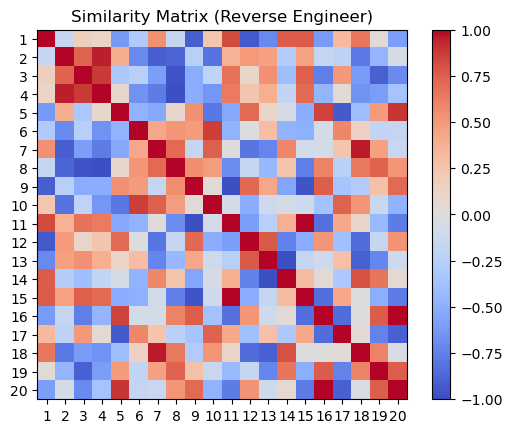

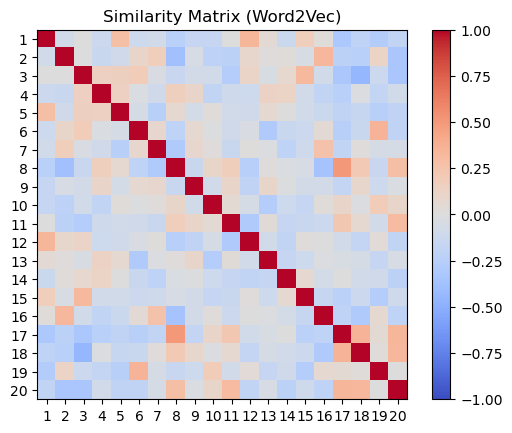

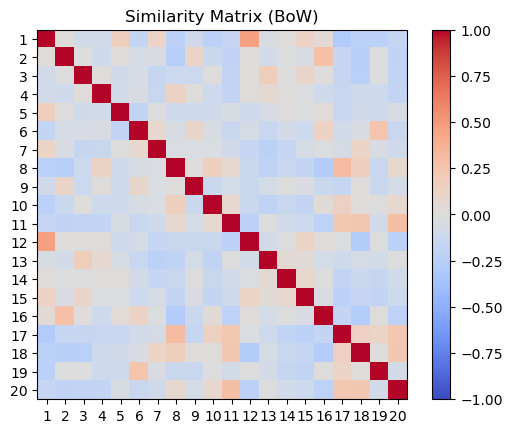

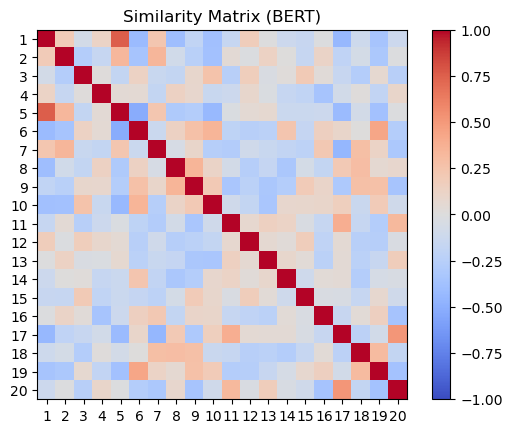

ValueError: 'c' argument has 40 elements, which is inconsistent with 'x' and 'y' with size 20.

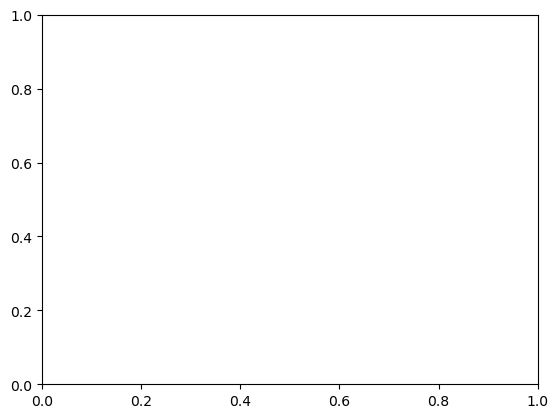

In [111]:
tEmbeddingsAll = torch.cat((tEmbeddingsHair, tEmbeddingsCleaner), dim=0)
tEmbeddingsAll_demeaned = torch.cat((tEmbeddingsHair - torch.mean(tEmbeddingsHair, axis = 0), tEmbeddingsCleaner - torch.mean(tEmbeddingsCleaner, axis = 0)), dim=0)
tEmbeddingsAllA = torch.cat((tEmbeddingsHair[:10, ], tEmbeddingsCleaner[:10, ]), dim=0)
tEmbeddingsAllB = torch.cat((tEmbeddingsHair[10:, ], tEmbeddingsCleaner[10:, ]), dim=0)

# tFLEmbeddingsAll = torch.cat((tFLEmbeddingsHair, tFLEmbeddingsCleaner), dim=0)
# tFLEmbeddingsAll_demeaned = torch.cat((tFLEmbeddingsHair - torch.mean(tFLEmbeddingsHair, axis = 0), tFLEmbeddingsCleaner - torch.mean(tFLEmbeddingsCleaner, axis = 0)), dim=0)

# tLLEmbeddingsAll = torch.cat((tLLEmbeddingsHair, tLLEmbeddingsCleaner), dim=0)
# tLLEmbeddingsAll_demeaned = torch.cat((tLLEmbeddingsHair - torch.mean(tLLEmbeddingsHair, axis = 0), tLLEmbeddingsCleaner - torch.mean(tLLEmbeddingsCleaner, axis = 0)), dim=0)

lClaimsAll = lClaimsHair + lClaimsSurface

SE = SummaryEmbeddings(lClaimsHairCleanerOrder)
seBert = SE.bert()
seBoW = SE.bow()
seWord2Vec = SE.word2vec()

similarity_matrix_bert = calc_similarity_matrix(seBert)
similarity_matrix_bow = calc_similarity_matrix(seBoW)
similarity_matrix_word2vec = calc_similarity_matrix(seWord2Vec)
similarity_matrix_re = calc_similarity_matrix(tEmbeddingsAll.detach().numpy())
#similarity_matrix_ie = calc_similarity_matrix(tInputEmbeddingsAll.detach().numpy())
# similarity_matrix_re_fl = calc_similarity_matrix(tFLEmbeddingsAll.detach().numpy())
# similarity_matrix_re_ll = calc_similarity_matrix(tLLEmbeddingsAll.detach().numpy())

visualize_correlations(similarity_matrix_re, "Reverse Engineer")
# visualize_correlations(similarity_matrix_re_fl, "FL Reverse Engineer")
# visualize_correlations(similarity_matrix_re_ll, "LL Reverse Engineer")
#visualize_correlations(similarity_matrix_ie, "Input Embedding")
visualize_correlations(similarity_matrix_word2vec, "Word2Vec")
visualize_correlations(similarity_matrix_bow, "BoW")
visualize_correlations(similarity_matrix_bert, "BERT")

# 0 is tangible, 1 is intangible
vColorAssign = np.zeros(40)
vColorAssign[:10] = 0
vColorAssign[10:20] = 1
vColorAssign[20:30] = 0
vColorAssign[30:] = 1

visualize_pca(similarity_matrix_re, "Reverse Engineer", vColorAssign)
# visualize_pca(similarity_matrix_re_fl, "FL Reverse Engineer", vColorAssign)
# visualize_pca(similarity_matrix_re_ll, "LL Reverse Engineer", vColorAssign)
#visualize_pca(similarity_matrix_ie, "Input Embedding", vColorAssign)
visualize_pca(similarity_matrix_word2vec, "Word2Vec", vColorAssign)
visualize_pca(similarity_matrix_bow, "BoW", vColorAssign)
visualize_pca(similarity_matrix_bert, "BERT", vColorAssign)

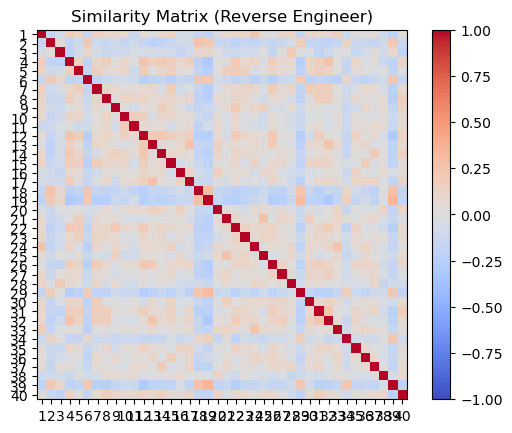

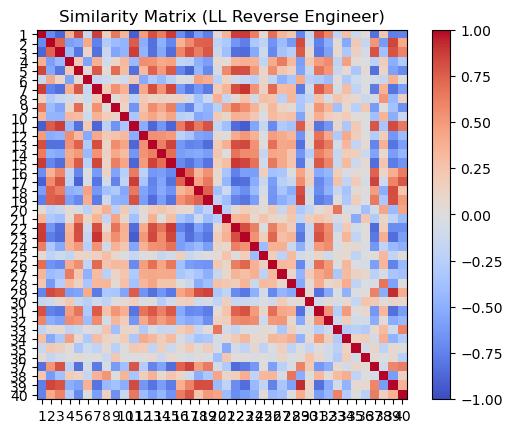

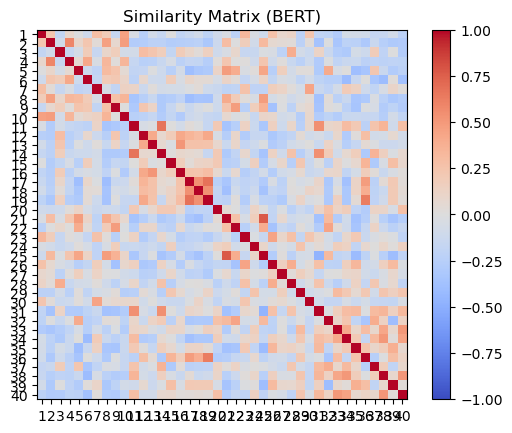

In [124]:
#| label: fig-corr-all
#| layout-ncol: 3
visualize_correlations(similarity_matrix_re, "Reverse Engineer")
visualize_correlations(similarity_matrix_re_ll, "LL Reverse Engineer")
visualize_correlations(similarity_matrix_bert, "BERT")

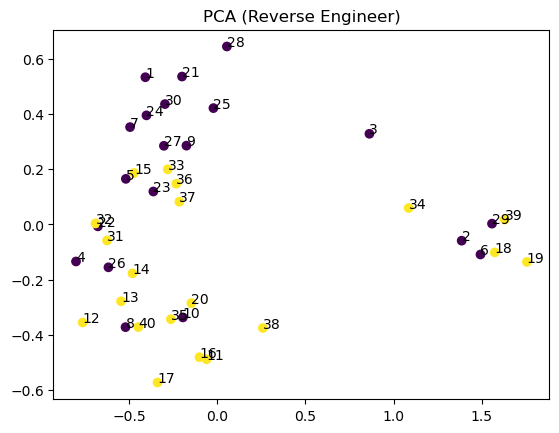

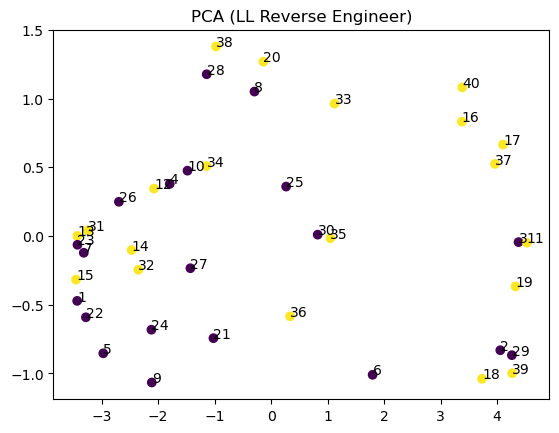

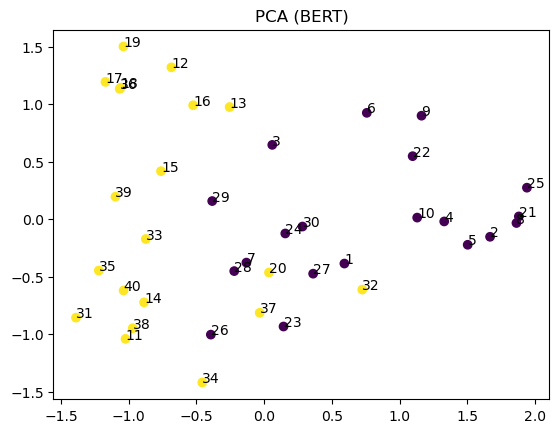

In [125]:
#| label: fig-pca-all
#| layout-ncol: 3
visualize_pca(similarity_matrix_re, "Reverse Engineer", vColorAssign)
visualize_pca(similarity_matrix_re_ll, "LL Reverse Engineer", vColorAssign)
visualize_pca(similarity_matrix_bert, "BERT", vColorAssign)

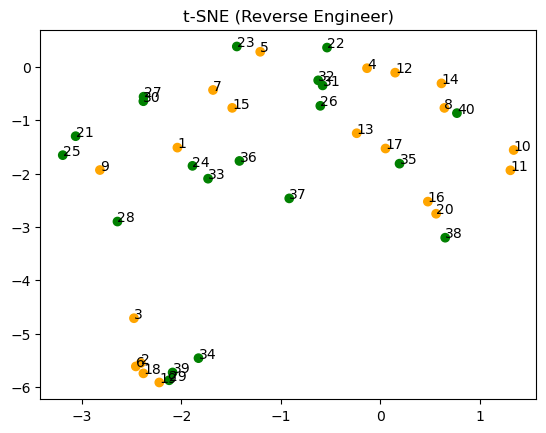

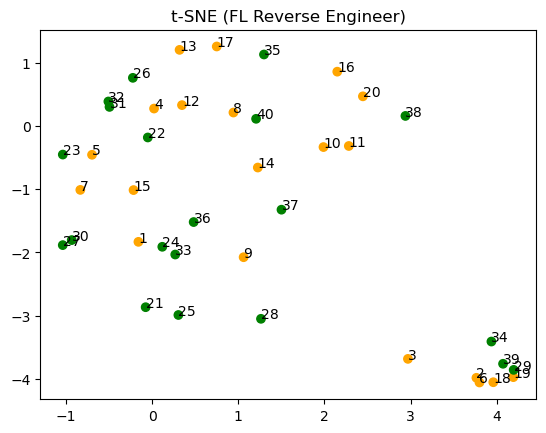

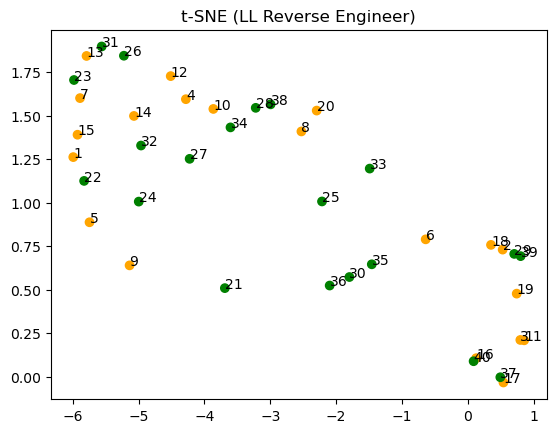

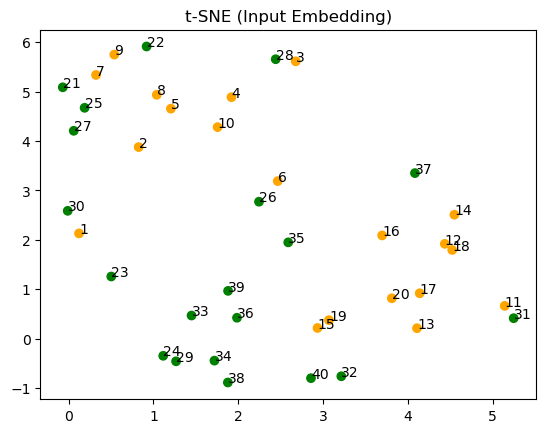

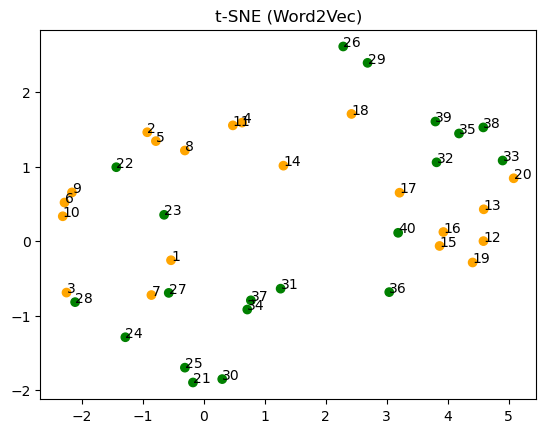

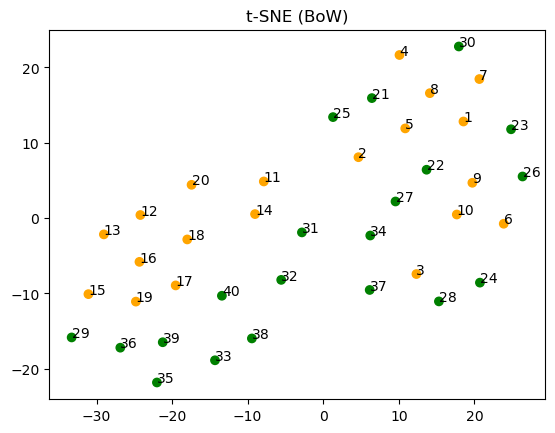

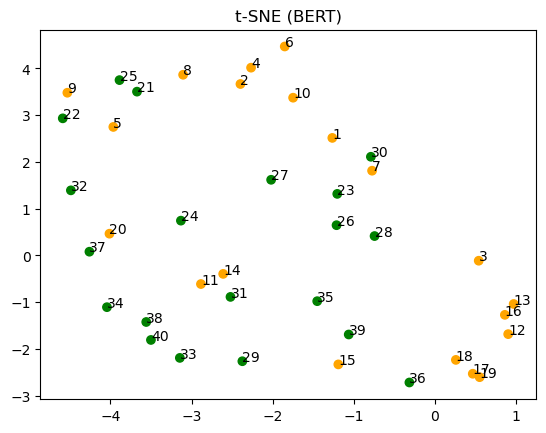

In [126]:
iPerplexity = 20
visualize_tsne(similarity_matrix_re, "Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_re_fl, "FL Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_re_ll, "LL Reverse Engineer", iPerplexity)
visualize_tsne(similarity_matrix_ie, "Input Embedding", iPerplexity)
visualize_tsne(similarity_matrix_word2vec, "Word2Vec", iPerplexity)
visualize_tsne(similarity_matrix_bow, "BoW", iPerplexity)
visualize_tsne(similarity_matrix_bert, "BERT", iPerplexity)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


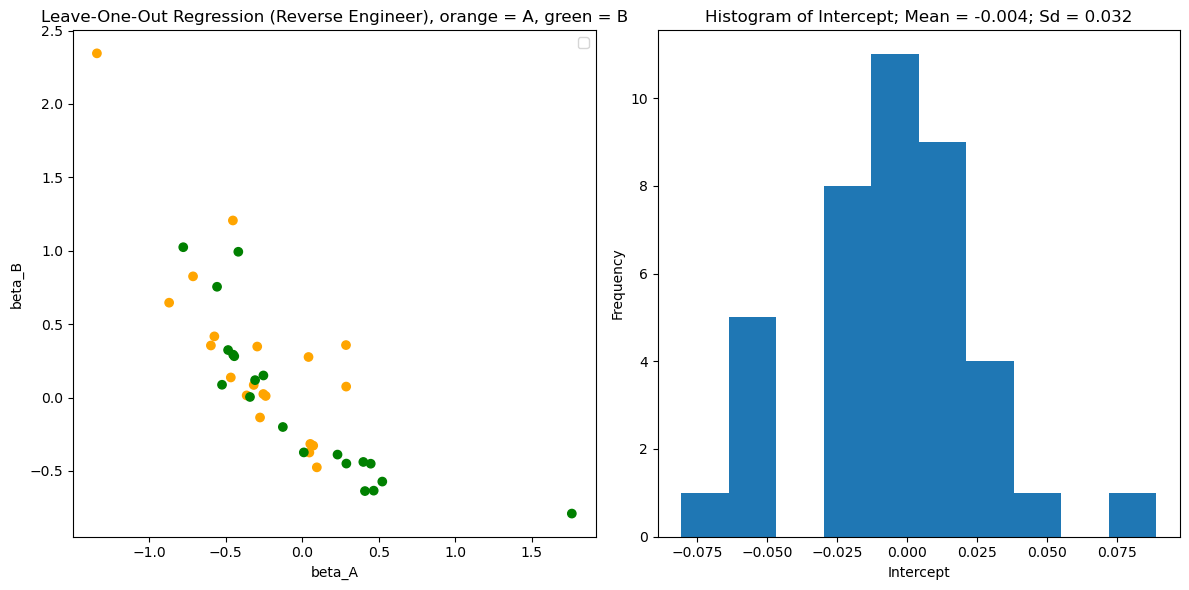

In [127]:
SE = SummaryEmbeddings(lClaimsAll)
embeddings_bert = SE.bert()
embeddings_word2vec = SE.word2vec()
embeddings_bow = SE.bow()

lResults = loo_regression(tEmbeddingsAllA.detach().numpy(), tEmbeddingsAllB.detach().numpy(), (tEmbeddingsAll - torch.mean(tEmbeddingsAll, dim=0)).detach().numpy(), "Reverse Engineer")
# lResults = loo_regression(embeddings_word2vec[:10, ], embeddings_word2vec[10:, ], embeddings_word2vec - np.mean(embeddings_word2vec, axis=0), "Word2Vec")
# lResults = loo_regression(embeddings_bow[:10, ], embeddings_bow[10:, ], embeddings_bow - np.mean(embeddings_bow, axis=0), "BoW")
# lResults = loo_regression(embeddings_bert[:10, ], embeddings_bert[10:, ], embeddings_bert - np.mean(embeddings_bert, axis=0), "BERT")